In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

k=KNeighborsClassifier()
d=DecisionTreeClassifier()
r=RandomForestClassifier()
l=LogisticRegression()
mb=MultinomialNB()
    
from sklearn.model_selection import train_test_split

from wordcloud import WordCloud, STOPWORDS
from PIL import Image

from textblob import TextBlob

import warnings
warnings.filterwarnings('ignore')  

In [5]:
df=pd.read_csv("all-data.csv",encoding="iso-8859-1")#https://www.kaggle.com/datasets/ankurzing/sentiment-analysis-for-financial-news

In [6]:
df

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
...,...,...
4840,negative,LONDON MarketWatch -- Share prices ended lower...
4841,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4842,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4843,negative,Net sales of the Paper segment decreased to EU...


In [7]:
df["neutral"].value_counts()

neutral
neutral     2878
positive    1363
negative     604
Name: count, dtype: int64

In [8]:
df.rename(columns ={'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .':'text'},inplace=True)
#We are changing the name of the column.

In [9]:
df["text"]=df["text"].str.lower() #We convert our texts to lowercase.
df["text"]=df["text"].str.replace("[^\w\s]","") #We remove punctuation marks from our texts.
df["text"]=df["text"].str.replace("\d+","") #We are removing numbers from our texts.
df["text"]=df["text"].str.replace("\n","").replace("\r","") #We remove spaces in our texts.
df_neutral=df[df['neutral']=="neutral"]
df_positive=df[df['neutral']=="positive"]
df_negative=df[df['neutral']=="negative"]
df["neutral"]=df["neutral"].map({"positive":1,"negative":0,"neutral":2})
df['neutral']=df['neutral'].astype(int)
df1=df[df['neutral']!=2]
#We divide it into positive 

In [10]:
vect=CountVectorizer(lowercase=True,stop_words="english")
x=df1.text
y=df1.neutral
x=vect.fit_transform(x)

In [11]:
def sentiment_classification_funct(x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=60)
    
    print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
    
    k=KNeighborsClassifier()
    d=DecisionTreeClassifier()
    r=RandomForestClassifier()
    l=LogisticRegression()
    mb=MultinomialNB()
    
    algos=[k,d,r,l,mb]
    algo_names=['KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','MultinomialNB']
    
    accuracy_scored=[]
    precision_scored=[]
    recall_scored=[]
    f1_scored=[]
    
    for item in algos:
        item.fit(x_train,y_train)
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))
        precision_scored.append(precision_score(y_test,item.predict(x_test)))
        recall_scored.append(recall_score(y_test,item.predict(x_test)))
        f1_scored.append(f1_score(y_test,item.predict(x_test)))
        
    result=pd.DataFrame(columns=['f1_score','recall_score','precision_score','accuracy_score'],index=algo_names)
    result.f1_score=f1_scored
    result.recall_score=recall_scored
    result.precision_score=precision_scored
    result.accuracy_score=accuracy_scored
    sentiment_classification_funct.result=result.sort_values('f1_score',ascending=False)
    return result.sort_values('f1_score',ascending=False)

In [12]:
sentiment_classification_funct(x,y)

(1573, 5287) (394, 5287) (1573,) (394,)


,f1_score,recall_score,precision_score,accuracy_score
RandomForestClassifier,0.882662,0.958175,0.818182,0.829949
LogisticRegression,0.872792,0.939163,0.815182,0.817259
DecisionTreeClassifier,0.863469,0.889734,0.838710,0.812183
MultinomialNB,0.849057,0.855513,0.842697,0.796954
KNeighborsClassifier,0.822335,0.923954,0.740854,0.733503


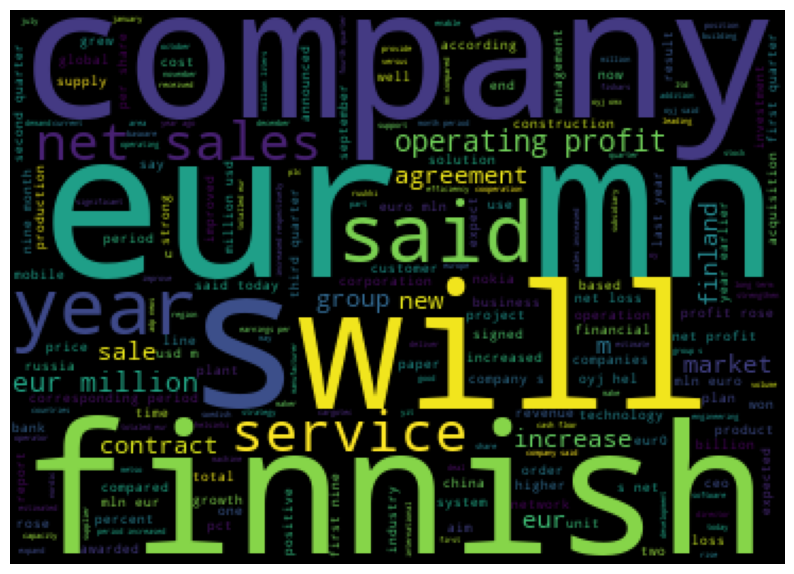

In [ ]:
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open("pngtree-pure-black-dark-background-wallpaper-image_396553.jpg"))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
    wc.generate(" ".join(data))
    plt.imshow(wc)
    plt.axis("off")
    
wc(df_positive.text,"black")

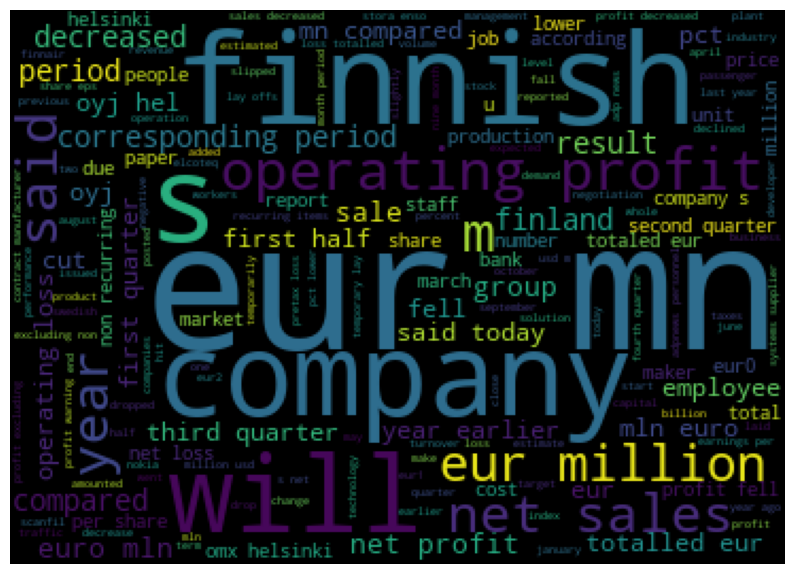

In [ ]:
wc(df_negative.text,"black")##Negative

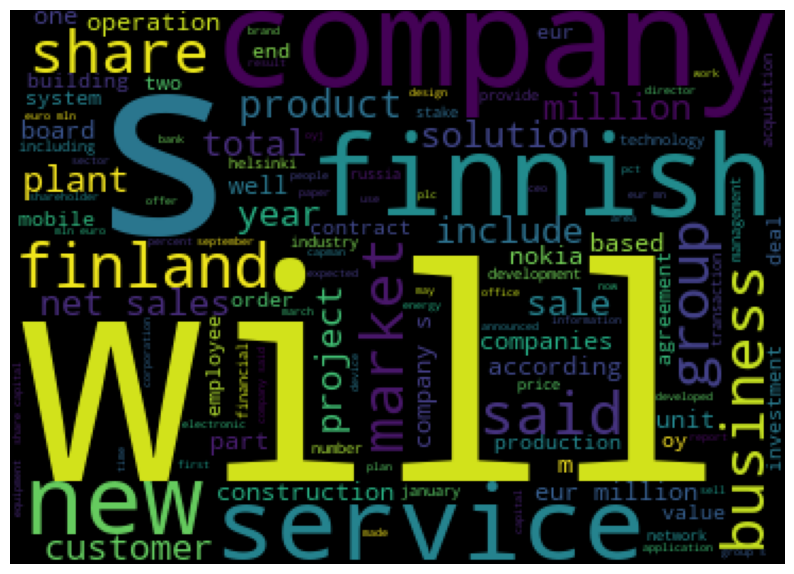

In [ ]:
wc(df_neutral.text,"black")##Neutral

In [20]:
sent=df[["neutral","text"]]
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [21]:
sent["sentiment"]=sent["text"].apply(detect_sentiment)
sent.head()

,neutral,text,sentiment
0,2,technopolis plans to develop in stages an area...,0.083333
1,0,the international electronic industry company ...,0.000000
2,1,with the new production plant the company woul...,-0.064802
3,1,according to the company 's updated strategy f...,0.000000
4,1,financing of aspocomp 's growth aspocomp is ag...,0.500000


In [22]:
def sentiment2(sent):
    if (sent< -0.02):
        return 3
    elif sent>0.02:
        return 1
    else:
        return 0
    
sent["sent"]=sent["sentiment"].apply(sentiment2)
sent.head()

,neutral,text,sentiment,sent
0,2,technopolis plans to develop in stages an area...,0.083333,1
1,0,the international electronic industry company ...,0.000000,0
2,1,with the new production plant the company woul...,-0.064802,3
3,1,according to the company 's updated strategy f...,0.000000,0
4,1,financing of aspocomp 's growth aspocomp is ag...,0.500000,1


In [23]:
sent.sentiment.value_counts()

sentiment
 0.000000    2466
 0.100000     103
 0.250000     101
 0.136364      96
 0.500000      79
             ... 
-0.185185       1
 0.313636       1
 0.178788       1
 0.520000       1
 0.112662       1
Name: count, Length: 496, dtype: int64